# Estimated Time Arrival

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Preprocessing

### Load Datasets

In [2]:
from_warehouse_df = pd.read_csv('../Datasets/results-fromwarehouse.csv')
from_warehouse_df.head()

,lat_origin,long_origin,lat_destination,long_destination,Jarak,Waktu Tempuh,Waktu Penulisan,Link
0,-6.395965,106.897527,-6.444471,106.72434,"40,6 km",1 jam 2 mnt,2025-03-20 10:06:55,"https://www.google.com/maps/dir/'-6.395965,106..."
1,-6.395965,106.897527,-6.444471,106.72434,"50,0 km",1 jam 2 mnt,2025-03-20 10:06:56,"https://www.google.com/maps/dir/'-6.395965,106..."
2,-6.395965,106.897527,-6.16938,106.609849,"55,6 km",1 jam 4 mnt,2025-03-20 10:07:16,"https://www.google.com/maps/dir/'-6.395965,106..."
3,-6.395965,106.897527,-6.16938,106.609849,"55,6 km",1 jam 6 mnt,2025-03-20 10:07:16,"https://www.google.com/maps/dir/'-6.395965,106..."
4,-6.395965,106.897527,-6.245515,106.963095,"28,1 km",40 mnt,2025-03-20 10:07:36,"https://www.google.com/maps/dir/'-6.395965,106..."


In [3]:
random_location_df = pd.read_csv('../Datasets/results-allrandom.csv')
random_location_df.head()

,lat_origin,long_origin,lat_destination,long_destination,Jarak,Waktu Tempuh,Waktu Penulisan,Link
0,lat_origin,long_origin,lat_destination,long_destination,Jarak,Waktu Tempuh,Waktu Penulisan,Link
1,-6.403632,106.875937,-6.47717,106.860436,"11,5 km",29 mnt,2025-03-20 10:00:20,"https://www.google.com/maps/dir/'-6.403632,106..."
2,-6.403632,106.875937,-6.47717,106.860436,"15,7 km",29 mnt,2025-03-20 10:00:21,"https://www.google.com/maps/dir/'-6.403632,106..."
3,-6.277224,106.830669,-6.227915,106.969559,"27,4 km",47 mnt,2025-03-20 10:00:38,"https://www.google.com/maps/dir/'-6.277224,106..."
4,-6.277224,106.830669,-6.227915,106.969559,"27,2 km",49 mnt,2025-03-20 10:00:38,"https://www.google.com/maps/dir/'-6.277224,106..."


### Check the Dataset Stats

#### from_warehouse_df

In [4]:
from_warehouse_df.describe()

,lat_origin,long_origin,lat_destination,long_destination,Jarak,Waktu Tempuh,Waktu Penulisan,Link
count,45901,45901,45901,45901,45901,45901,45901,45901
unique,2,2,24270,24265,694,146,34308,27689
top,-6.395965,106.897527,lat_destination,long_destination,Jarak,48 mnt,Waktu Penulisan,Link
freq,45668,45668,233,233,233,1316,233,233


In [5]:
from_warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45901 entries, 0 to 45900
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   lat_origin        45901 non-null  object
 1   long_origin       45901 non-null  object
 2   lat_destination   45901 non-null  object
 3   long_destination  45901 non-null  object
 4   Jarak             45901 non-null  object
 5   Waktu Tempuh      45901 non-null  object
 6   Waktu Penulisan   45901 non-null  object
 7   Link              45901 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


#### random_location_df

In [6]:
random_location_df.describe()

,lat_origin,long_origin,lat_destination,long_destination,Jarak,Waktu Tempuh,Waktu Penulisan,Link
count,47616,47616,47616,47616,47616,47616,47616,47616
unique,24388,24312,24411,24447,947,180,34958,28112
top,lat_origin,long_origin,lat_destination,long_destination,Jarak,51 mnt,Waktu Penulisan,Link
freq,234,234,234,234,234,952,234,234


In [7]:
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47616 entries, 0 to 47615
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   lat_origin        47616 non-null  object
 1   long_origin       47616 non-null  object
 2   lat_destination   47616 non-null  object
 3   long_destination  47616 non-null  object
 4   Jarak             47616 non-null  object
 5   Waktu Tempuh      47616 non-null  object
 6   Waktu Penulisan   47616 non-null  object
 7   Link              47616 non-null  object
dtypes: object(8)
memory usage: 2.9+ MB


### Data Cleaning

#### Change Columns Name

In [8]:
from_warehouse_df.columns = ['lat_ori', 'long_ori', 'lat_dest', 'long_dest', 'distance', 'eta', 'timestamp', 'link']
from_warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45901 entries, 0 to 45900
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lat_ori    45901 non-null  object
 1   long_ori   45901 non-null  object
 2   lat_dest   45901 non-null  object
 3   long_dest  45901 non-null  object
 4   distance   45901 non-null  object
 5   eta        45901 non-null  object
 6   timestamp  45901 non-null  object
 7   link       45901 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


In [9]:
random_location_df.columns = ['lat_ori', 'long_ori', 'lat_dest', 'long_dest', 'distance', 'eta', 'timestamp', 'link']
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47616 entries, 0 to 47615
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lat_ori    47616 non-null  object
 1   long_ori   47616 non-null  object
 2   lat_dest   47616 non-null  object
 3   long_dest  47616 non-null  object
 4   distance   47616 non-null  object
 5   eta        47616 non-null  object
 6   timestamp  47616 non-null  object
 7   link       47616 non-null  object
dtypes: object(8)
memory usage: 2.9+ MB


#### Remove Unused Columns

In [10]:
from_warehouse_df.drop('link', axis=1, inplace=True)
random_location_df.drop('link', axis=1, inplace=True)
from_warehouse_df.drop('lat_ori', axis=1, inplace=True)
random_location_df.drop('lat_ori', axis=1, inplace=True)
from_warehouse_df.drop('long_ori', axis=1, inplace=True)
random_location_df.drop('long_ori', axis=1, inplace=True)
from_warehouse_df.drop('lat_dest', axis=1, inplace=True)
random_location_df.drop('lat_dest', axis=1, inplace=True)
from_warehouse_df.drop('long_dest', axis=1, inplace=True)
random_location_df.drop('long_dest', axis=1, inplace=True)

from_warehouse_df.info()
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45901 entries, 0 to 45900
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   distance   45901 non-null  object
 1   eta        45901 non-null  object
 2   timestamp  45901 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47616 entries, 0 to 47615
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   distance   47616 non-null  object
 1   eta        47616 non-null  object
 2   timestamp  47616 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


#### Remove Unused Rows

In [ ]:
from_warehouse_df = from_warehouse_df[from_warehouse_df.distance != 'Jarak']
from_warehouse_df = from_warehouse_df[from_warehouse_df.distance != 'Data tidak tersedia']
from_warehouse_df = from_warehouse_df[from_warehouse_df.eta != 'Waktu Tempuh']
from_warehouse_df = from_warehouse_df[from_warehouse_df.timestamp != 'Waktu Penulisan']

from_warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45667 entries, 0 to 45900
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   distance   45667 non-null  object
 1   eta        45667 non-null  object
 2   timestamp  45667 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [ ]:
random_location_df = random_location_df[random_location_df.distance != 'Jarak']
random_location_df = random_location_df[random_location_df.distance != 'Data tidak tersedia']
random_location_df = random_location_df[random_location_df.eta != 'Waktu Tempuh']
random_location_df = random_location_df[random_location_df.timestamp != 'Waktu Penulisan']

random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47379 entries, 1 to 47615
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   distance   47379 non-null  object
 1   eta        47379 non-null  object
 2   timestamp  47379 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


#### Change the Data Types

In [15]:
from_warehouse_df.distance = from_warehouse_df.distance.str.replace(' km', '')
random_location_df.distance = random_location_df.distance.str.replace(' km', '')
from_warehouse_df.distance = from_warehouse_df.distance.str.replace(' m', '')
random_location_df.distance = random_location_df.distance.str.replace(' m', '')
from_warehouse_df.distance = from_warehouse_df.distance.str.replace(',', '.')
random_location_df.distance = random_location_df.distance.str.replace(',', '.')

In [16]:
from_warehouse_df.distance = pd.to_numeric(from_warehouse_df.distance)
random_location_df.distance = pd.to_numeric(random_location_df.distance)

from_warehouse_df.info()
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45667 entries, 0 to 45900
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   distance   45667 non-null  float64
 1   eta        45667 non-null  object 
 2   timestamp  45667 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 47379 entries, 1 to 47615
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   distance   47379 non-null  float64
 1   eta        47379 non-null  object 
 2   timestamp  47379 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [17]:
def convert_to_minutes(duration):
    total_minutes = 0
    parts = duration.split()
    
    for i in range(len(parts)):
        if 'jam' in parts[i]:
            total_minutes += int(parts[i - 1]) * 60
        elif 'mnt' in parts[i]:
            total_minutes += int(parts[i - 1])
            
    return total_minutes

In [18]:
from_warehouse_df.eta = from_warehouse_df.eta.apply(convert_to_minutes)
random_location_df.eta = random_location_df.eta.apply(convert_to_minutes)

from_warehouse_df.eta = pd.to_numeric(from_warehouse_df.eta)
random_location_df.eta = pd.to_numeric(random_location_df.eta)

from_warehouse_df.info()
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45667 entries, 0 to 45900
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   distance   45667 non-null  float64
 1   eta        45667 non-null  int64  
 2   timestamp  45667 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 47379 entries, 1 to 47615
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   distance   47379 non-null  float64
 1   eta        47379 non-null  int64  
 2   timestamp  47379 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ MB


In [19]:
from_warehouse_df.timestamp = pd.to_datetime(from_warehouse_df.timestamp, format='%Y-%m-%d %H:%M:%S')
random_location_df.timestamp = pd.to_datetime(random_location_df.timestamp, format='%Y-%m-%d %H:%M:%S')

from_warehouse_df['is_weekend'] = (from_warehouse_df['timestamp'].dt.dayofweek >= 5)
from_warehouse_df['is_peak_hour'] = ((from_warehouse_df['timestamp'].dt.hour >= 6) & (from_warehouse_df['timestamp'].dt.hour < 11) | (from_warehouse_df['timestamp'].dt.hour >= 16) & (from_warehouse_df['timestamp'].dt.hour < 22))

random_location_df['is_weekend'] = (random_location_df['timestamp'].dt.dayofweek >= 5)
random_location_df['is_peak_hour'] = ((random_location_df['timestamp'].dt.hour >= 6) & (random_location_df['timestamp'].dt.hour < 11) | (random_location_df['timestamp'].dt.hour >= 16) & (random_location_df['timestamp'].dt.hour < 22))

random_location_df['timestamp'] = (random_location_df['timestamp'].dt.hour * 60 +
                                   random_location_df['timestamp'].dt.minute)

from_warehouse_df['timestamp'] = (from_warehouse_df['timestamp'].dt.hour * 60 +
                                  from_warehouse_df['timestamp'].dt.minute)

from_warehouse_df.info()
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45667 entries, 0 to 45900
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      45667 non-null  float64
 1   eta           45667 non-null  int64  
 2   timestamp     45667 non-null  int32  
 3   is_weekend    45667 non-null  bool   
 4   is_peak_hour  45667 non-null  bool   
dtypes: bool(2), float64(1), int32(1), int64(1)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
Index: 47379 entries, 1 to 47615
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      47379 non-null  float64
 1   eta           47379 non-null  int64  
 2   timestamp     47379 non-null  int32  
 3   is_weekend    47379 non-null  bool   
 4   is_peak_hour  47379 non-null  bool   
dtypes: bool(2), float64(1), int32(1), int64(1)
memory usage: 1.4 MB


In [ ]:
from_warehouse_df.to_csv('../Datasets/from_warehouse_v3.csv', index=False)
random_location_df.to_csv('../Datasets/random_location_v3.csv', index=False)

## Model Development

### Prepare the Feature and Target Datasets

In [ ]:
df = pd.concat([from_warehouse_df, random_location_df], ignore_index=True)
df = df.drop(['timestamp'], axis=1)

df.info()

df.to_csv('../Datasets/all_data_v3.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93046 entries, 0 to 93045
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      93046 non-null  float64
 1   eta           93046 non-null  int64  
 2   is_weekend    93046 non-null  bool   
 3   is_peak_hour  93046 non-null  bool   
dtypes: bool(2), float64(1), int64(1)
memory usage: 1.6 MB


In [ ]:
# Remove rows with distance > 100
df = df[df.distance <= 100]
df.describe()

,distance,eta
count,93011.000000,93011.000000
mean,34.988036,53.309490
std,15.653999,20.965125
min,1.000000,3.000000
25%,22.900000,39.000000
50%,34.400000,51.000000
75%,46.000000,64.000000
max,99.800000,210.000000


#### Split the Dataset into Training and Testing

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['eta'], axis=1), df['eta'], test_size=0.2, random_state=42)

x_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74408 entries, 31937 to 15797
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      74408 non-null  float64
 1   is_weekend    74408 non-null  bool   
 2   is_peak_hour  74408 non-null  bool   
dtypes: bool(2), float64(1)
memory usage: 1.3 MB
<class 'pandas.core.series.Series'>
Index: 74408 entries, 31937 to 15797
Series name: eta
Non-Null Count  Dtype
--------------  -----
74408 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


#### Model Building

In [27]:
# Scaling X (fit & transform for training, transform only for testing)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Scaling Y (target)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.to_numpy().reshape(-1, 1)).flatten()

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(optimizer=optimizer, loss='mae')

# Train the model with early stopping
history = model.fit(
    x_train_scaled, y_train_scaled,
    epochs=1000,
    batch_size=64,
    verbose=1,
    validation_data=(x_test_scaled, y_test_scaled),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

Epoch 1/1000


c:\Users\mbint\anaconda3\envs\bangkit\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1163/1163 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.8304 - val_loss: 0.5636
Epoch 2/1000
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5408 - val_loss: 0.5157
Epoch 3/1000
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - loss: 0.5117 - val_loss: 0.4992
Epoch 4/1000
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - loss: 0.5016 - val_loss: 0.5023
Epoch 5/1000
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - loss: 0.4997 - val_loss: 0.4933
Epoch 6/1000
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 0.4959 - val_loss: 0.4939
Epoch 7/1000
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.4937 - val_loss: 0.4922
Epoch 8/1000
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - loss: 0.4931 - val_loss: 0.4898
Epoch 9/1000
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 0.4937 - val_loss: 0.5037
Epoch 10/1000
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - loss: 0.4927 - val_loss: 0.5044
Epoch 11/1000
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - loss: 0.4911 - val_loss: 0.4961
Epo

#### Evaluate the Model

In [ ]:
# Predict and inverse transform to original scale
y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Optional: convert y_test back to array for evaluation/plotting
y_test_actual = y_test.to_numpy()

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_actual, y_pred)
print(f"MAE on actual scale: {mae:.2f} minutes")

582/582 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
MAE on actual scale: 10.01


#### Evaluate Actual vs Predicted Values

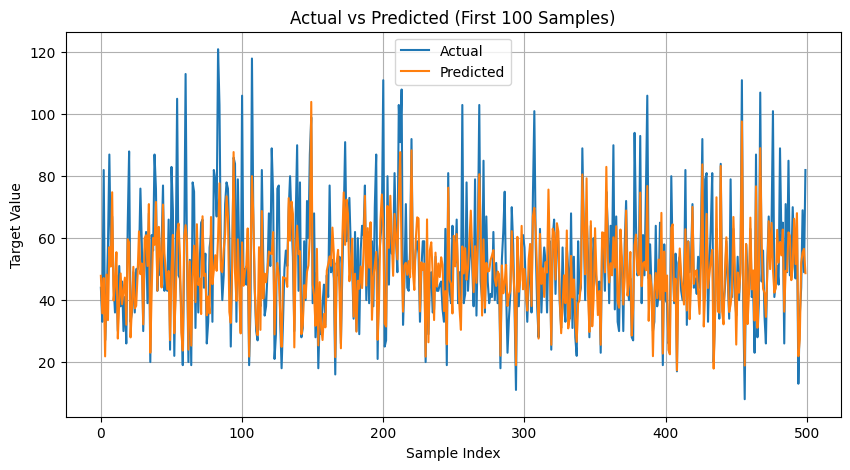

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test_actual[:500], label='Actual')
plt.plot(y_pred[:500], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.grid(True)
plt.show()

#### Test the model on sample data

In [ ]:
sample_input = np.array([31.4, False, False])

# Pastikan input jadi 2D array
sample_input = sample_input.reshape(1, -1)

# Prediksi (output masih dalam skala scaled target)
pred_scaled = model.predict(sample_input)

# Ubah ke skala asli
pred_actual = y_scaler.inverse_transform(pred_scaled)

print("Predicted value (actual scale):", pred_actual[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted value (actual scale): 527.6442
